# Cardio Vascular disease Binary class prediction

notebook นี้เป็นการ optimized binary classification จาก [paper](https://arxiv.org/abs/2203.04921) ซึ่งวิธีหลักที่ใช้ในการเพิ่มประสิทธิภาพคือ

1.   เรามี data ที่ enrich กว่ามาก จาก paper ใช้ไปแค่ 300 entries / เรามี 2025 entries ทำให้โมเดล generalized ได้ดีกว่า
2.   data preprocessing มีความละเอียดกว่าใน paper มากซึ่งจะมี pipeline คือ rawdata->EDA->missingvalue->Impute(classinbalance)->feature engineering->outlier->encoding->scaling (จะเห็น pipeline ได้ชัดกว่าใน multiclass)


Note:

1.   เนื่องจากผลออกมาดีเกินคาด accuracy 92% -> 98% ในโมเดล Random forrest ทำให้ยังไม่ได้ทำ fusion model ต่อ
3. Evaluation method ของเราใช้วิธีเดียวกับ paper คือ 80:20 split เพื่อให้เทียบผลกันได้







#Setup

In [10]:
# @title Libs
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense ,BatchNormalization

from tensorflow.keras.optimizers import Adam,SGD

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Binary Class CVD

##data preparation

In [30]:
df1 = pd.read_csv("/content/binar_india.csv")
# 0. Drop columns 'id' and 'dataset'
df1.drop(columns=['pid'], inplace=True)

In [54]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [32]:
df = pd.read_csv("/content/binar_main.csv")

# 0. Drop columns 'id' and 'dataset'
# df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['thal'], inplace=True)



In [33]:
# prompt: fit dt to X_train, X_test, y_train, y_test and then get features importances with the name of features

from sklearn.tree import DecisionTreeClassifier
x = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Get feature importances
importances = dt.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

feature_importances_df

,Feature,Importance
2,cp,0.283681
11,ca,0.162809
0,age,0.135946
9,oldpeak,0.078801
7,thalach,0.075035
4,chol,0.070826
8,exang,0.053433
3,trestbps,0.048479
1,sex,0.047380
10,slope,0.028743


In [34]:
df = pd.concat([df, df1], ignore_index=True)
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'ca'], drop_first=True) #, 'thal'

In [35]:
df['target'].value_counts()

,count
target,
1,1106
0,919


In [36]:
df.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,cp_3,restecg_1,restecg_2,slope_1,slope_2,slope_3,ca_1,ca_2,ca_3,ca_4
0,52,1,125,212,0,168,0,1.0,0,False,...,False,True,False,False,True,False,False,True,False,False
1,53,1,140,203,1,155,1,3.1,0,False,...,False,False,False,False,False,False,False,False,False,False
2,70,1,145,174,0,125,1,2.6,0,False,...,False,True,False,False,False,False,False,False,False,False
3,61,1,148,203,0,161,0,0.0,0,False,...,False,True,False,False,True,False,True,False,False,False
4,62,0,138,294,1,106,0,1.9,0,False,...,False,True,False,True,False,False,False,False,True,False


In [37]:
x  = df.drop(columns=['target'])
y  = df['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

##data prep 2

In [ ]:
df1 = pd.read_csv("/content/binar_india.csv")
df1.drop(columns=['pid'], inplace=True)

df2 = pd.read_csv("/content/binar_main.csv")
df2.drop(columns=['thal'], inplace=True)

df = pd.concat([df1, df2], ignore_index=True)

cat_cols=['sex','cp','fbs','restecg','exang','slope','trestbps_bins']
bool_cols=['fbs','exang']
numeric_cols=['age','trestbps','chol','thalach','oldpeak','ca']

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [ ]:
bins=[0,60,80,130, 135, 140]
labels=[0, 1,2, 3, 4]
df['trestbps_bins']=pd.cut(df['trestbps'], bins=bins, labels=labels)

# impute the missing values of trestos with mode
df['trestbps_bins'].fillna(df['trestbps_bins'].mode()[0], inplace=True)
df['trestbps_bins'].isnull().sum()
df.head()

<ipython-input-54-a1009cfd987e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trestbps_bins'].fillna(df['trestbps_bins'].mode()[0], inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,trestbps_bins
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1,2
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0,2
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0,3
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1,4
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1,2


In [ ]:
df['restecg']=df['restecg'].apply(lambda x:x.replace(' ', '-')if ' ' in str(x) else x)
df=df[df['trestbps']!=0]

In [ ]:
from sklearn.preprocessing import LabelEncoder
# lets encode the sex column using label encoder
le_sex=LabelEncoder()
df['sex']=le_sex.fit_transform(df[['sex']])
# lets encode the cp column using label encoder
le_cp=LabelEncoder()
df['cp']=le_cp.fit_transform(df[['cp']])
# lets encode the fbs column using label encoder
le_fbs=LabelEncoder()
df['fbs']=le_fbs.fit_transform(df[['fbs']])
# lets encode the trestecg column using label encoder
le_restecg=LabelEncoder()
df['restecg']=le_restecg.fit_transform(df[['restecg']])
# lets encode the exang column using label encoder
le_exang=LabelEncoder()
df['exang']=le_exang.fit_transform(df[['exang']])
# lets encode the slope column using label encoder
le_slope=LabelEncoder()
df['slope']=le_slope.fit_transform(df[['slope']])
# lets encode the trest_bins column using label encoder
le_trestbps_bins=LabelEncoder()
df['trestbps_bins']=le_trestbps_bins.fit_transform(df[['trestbps_bins']])
le_num_bins=LabelEncoder()

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,trestbps_bins
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1,0
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0,1
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1,2
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1,0


In [ ]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
pt_boxcox=PowerTransformer(standardize=True)
df[numeric_cols]=pt_boxcox.fit_transform(df[numeric_cols])
pt_yeojohnson=PowerTransformer(standardize=True)
df[numeric_cols]=pt_yeojohnson.fit_transform(df[numeric_cols])
qt_normal=QuantileTransformer(output_distribution='normal', random_state=42)
df[numeric_cols]=qt_normal.fit_transform(df[numeric_cols])

In [ ]:
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'ca','trestbps_bins'], drop_first=True)

In [ ]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,slope_2,slope_3,ca_1,ca_2,ca_3,ca_4,trestbps_bins_1,trestbps_bins_2,trestbps_bins_3,trestbps_bins_4
0,53,1,171,0,0,147,0,5.3,1,False,...,False,True,False,False,True,False,False,True,False,False
1,40,1,94,229,0,115,0,3.7,0,False,...,False,False,True,False,False,False,False,True,False,False
2,49,1,133,142,0,202,1,5.0,0,False,...,False,False,False,False,False,False,False,False,True,False
3,43,1,138,295,1,153,0,3.2,1,False,...,True,False,False,True,False,False,False,False,False,True
4,31,1,199,0,0,136,0,5.3,1,True,...,False,True,False,True,False,False,False,True,False,False


##model testing

In [39]:
# @title Random Forest
from sklearn.ensemble import RandomForestClassifier

X, y = df.drop("target", axis=1), df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

forest = RandomForestClassifier(random_state=9)

forest.fit(X_train, y_train)

y_pred3 = forest.predict(X_test)

import sklearn.metrics as metrics
scores3=metrics.accuracy_score(y_test,y_pred3)
print("Random Forrest Binaryclass Clasification")
print(f'accuracy: {forest.score(X_test, y_test)}')

print(metrics.confusion_matrix(y_test,y_pred3))
print(metrics.classification_report(y_test,y_pred3))

fpr1, tpr1, threshold = metrics.roc_curve(y_pred3,y_test)
roc_auc1 = metrics.auc(fpr1, tpr1)
print("roc_auc",roc_auc1)

Random Forrest Binaryclass Clasification
accuracy: 0.9827160493827161
[[183   3]
 [  4 215]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       186
           1       0.99      0.98      0.98       219

    accuracy                           0.98       405
   macro avg       0.98      0.98      0.98       405
weighted avg       0.98      0.98      0.98       405

roc_auc 0.9824240788892704


In [ ]:
# @title KNN

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


# Step 1: Standardize the features
scaler = StandardScaler()
#x_scaled = scaler.fit_transform(x)
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)


# Step 3: Train KNN model
knn = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(x_train, y_train)

# Step 4: Predict on test set
y_pred = knn.predict(x_test)

# Step 5: Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")
print("\nClassification Report:")
print(metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.96

Classification Report:
[[179   7]
 [ 10 209]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       186
           1       0.97      0.95      0.96       219

    accuracy                           0.96       405
   macro avg       0.96      0.96      0.96       405
weighted avg       0.96      0.96      0.96       405



In [ ]:
# @title Support Vector Machine

sc = StandardScaler()

from sklearn.svm import SVC
model1 = SVC(probability=True,C=.01)

X_train_scaled = sc.fit_transform(X_train)
X_train_svc=X_train_scaled
X_test_scaled = sc.transform(X_test)
X_test_svc=X_test_scaled


model1.fit(X_train_svc,y_train)
rounded_predictions1 = model1.predict(X_test_svc)
predictions1 =model1.predict_proba(X_test_svc)
y_pred1 = rounded_predictions1

import sklearn.metrics as metrics
scores=metrics.accuracy_score(y_test,y_pred1)
print("SVM Multi-class Clasification")
print(f'accuracy: {scores}')


print(metrics.confusion_matrix(y_test,y_pred1))
print(metrics.classification_report(y_test,y_pred1))

fpr1, tpr1, threshold = metrics.roc_curve(y_pred1,y_test)
roc_auc1 = metrics.auc(fpr1, tpr1)
print("roc_auc_DT",roc_auc1)

SVM Multi-class Clasification
accuracy: 0.745679012345679
[[ 90  96]
 [  7 212]]
              precision    recall  f1-score   support

           0       0.93      0.48      0.64       186
           1       0.69      0.97      0.80       219

    accuracy                           0.75       405
   macro avg       0.81      0.73      0.72       405
weighted avg       0.80      0.75      0.73       405

roc_auc_DT 0.80807336992904


In [ ]:
# @title Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Gradient Boosting model
model1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

# Train the model
model1.fit(X_train_scaled, y_train)

# Predict
y_pred1 = model1.predict(X_test_scaled)
predictions1 = model1.predict_proba(X_test_scaled)

# Evaluate
scores = metrics.accuracy_score(y_test, y_pred1)
print("Gradient Boosting Multi-class Classification")
print(f'accuracy: {scores}')

print(metrics.confusion_matrix(y_test, y_pred1))
print(metrics.classification_report(y_test, y_pred1))

fpr1, tpr1, threshold = metrics.roc_curve(y_pred1,y_test)
roc_auc1 = metrics.auc(fpr1, tpr1)
print("roc_auc_DT",roc_auc1)

Gradient Boosting Multi-class Classification
accuracy: 0.9234567901234568
[[170  16]
 [ 15 204]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       186
           1       0.93      0.93      0.93       219

    accuracy                           0.92       405
   macro avg       0.92      0.92      0.92       405
weighted avg       0.92      0.92      0.92       405

roc_auc_DT 0.923095823095823


In [38]:
# @title AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Scale the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# AdaBoost model
model1 = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
model1.fit(X_train_scaled, y_train)

# Predict
y_pred1 = model1.predict(X_test_scaled)
predictions1 = model1.predict_proba(X_test_scaled)

# Evaluate
scores = metrics.accuracy_score(y_test, y_pred1)
print("AdaBoost Multi-class Classification")
print(f'accuracy: {scores}')

print(metrics.confusion_matrix(y_test, y_pred1))
print(metrics.classification_report(y_test, y_pred1))

# ROC-AUC is not typically valid for multiclass directly without one-vs-rest
# So use One-vs-Rest strategy for ROC AUC if needed
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming y_test is multiclass
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_binarized = label_binarize(y_pred1, classes=np.unique(y_test))

fpr1, tpr1, _ = metrics.roc_curve(y_test_binarized.ravel(), y_pred_binarized.ravel())
roc_auc1 = metrics.auc(fpr1, tpr1)
print("roc_auc_AdaBoost:", roc_auc1)


AdaBoost Multi-class Classification
accuracy: 0.8123456790123457
[[142  30]
 [ 46 187]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       172
           1       0.86      0.80      0.83       233

    accuracy                           0.81       405
   macro avg       0.81      0.81      0.81       405
weighted avg       0.82      0.81      0.81       405

roc_auc_AdaBoost: 0.8140782513224873


In [ ]:
# @title Logistic Regression
# code for LR
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

model2 =LogisticRegression(C=.1)

model2.fit(X_train_scaled,y_train)

rounded_predictions2 = model2.predict(X_test_scaled)
predictions2 = model2.predict_proba(X_test_scaled)
y_pred2 = rounded_predictions2

import sklearn.metrics as metrics
scores2=metrics.accuracy_score(y_test,y_pred2)
print("LR",scores2)

print(metrics.confusion_matrix(y_test,y_pred2))
print(metrics.classification_report(y_test,y_pred2))

fpr1, tpr1, threshold = metrics.roc_curve(y_pred2,y_test)
roc_auc1 = metrics.auc(fpr1, tpr1)
print("roc_auc_DT",roc_auc1)

LR 0.8444444444444444
[[151  27]
 [ 36 191]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       178
           1       0.88      0.84      0.86       227

    accuracy                           0.84       405
   macro avg       0.84      0.84      0.84       405
weighted avg       0.85      0.84      0.84       405

roc_auc_DT 0.8418167100034342


In [ ]:
# @title ANN
# code for ANN

from keras.models import Sequential
from keras import regularizers
from keras.regularizers import l2
from keras.layers import Dense ,BatchNormalization
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from tensorflow.keras.optimizers import Adam,SGD
scaler = MinMaxScaler(feature_range=(0,1))
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

model4 = Sequential()

# Input + first hidden layer
model4.add(Dense(64, input_dim=12, use_bias=True, bias_initializer='zeros',
                 activation='relu', kernel_regularizer=l2(0.01)))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))

# Second hidden layer
model4.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))

# Third hidden layer
model4.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model4.add(BatchNormalization())

# Output layer
model4.add(Dense(4, activation='softmax'))
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model4.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])



#Normalize train & test sample
scaled_X_train_ann=scaler.fit_transform(X_train)
scaled_X_test_ann=scaler.transform(X_test)
# Train the Model

history=model4.fit(scaled_X_train_ann, y_train,validation_split=0.1, batch_size=5,epochs=24,shuffle=True,verbose=2)


predictions4 = model4.predict(scaled_X_test_ann,batch_size=5,verbose=0)
#rounded_predictions4 = model4.predict_classes(scaled_X_test_ann,batch_size=5,verbose=0)
rounded_predictions4=np.argmax(predictions4,axis=1)
y_pred4 = rounded_predictions4


#print(predictions)
import sklearn.metrics as metrics
scores4=metrics.accuracy_score(y_test,y_pred4)
print("ANN Multi-class Clasification")
print(f'accuracy: {scores4}')

print(metrics.confusion_matrix(y_test,y_pred4))
print(metrics.classification_report(y_test,y_pred4))

fpr1, tpr1, threshold = metrics.roc_curve(y_pred4,y_test)
roc_auc1 = metrics.auc(fpr1, tpr1)
print("roc_auc_DT",roc_auc1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/24


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


292/292 - 4s - 13ms/step - accuracy: 0.6365 - loss: 1.8532 - val_accuracy: 0.7778 - val_loss: 1.4072
Epoch 2/24
292/292 - 1s - 3ms/step - accuracy: 0.7606 - loss: 1.4208 - val_accuracy: 0.8457 - val_loss: 1.1722
Epoch 3/24
292/292 - 1s - 4ms/step - accuracy: 0.7901 - loss: 1.2471 - val_accuracy: 0.8457 - val_loss: 1.0411
Epoch 4/24
292/292 - 1s - 2ms/step - accuracy: 0.7682 - loss: 1.1510 - val_accuracy: 0.8642 - val_loss: 0.9801
Epoch 5/24
292/292 - 1s - 3ms/step - accuracy: 0.8093 - loss: 1.0246 - val_accuracy: 0.8580 - val_loss: 0.9014
Epoch 6/24
292/292 - 1s - 4ms/step - accuracy: 0.7963 - loss: 0.9622 - val_accuracy: 0.8704 - val_loss: 0.8502
Epoch 7/24
292/292 - 2s - 7ms/step - accuracy: 0.8093 - loss: 0.9063 - val_accuracy: 0.8395 - val_loss: 0.8176
Epoch 8/24
292/292 - 3s - 11ms/step - accuracy: 0.7922 - loss: 0.8700 - val_accuracy: 0.8272 - val_loss: 0.7378
Epoch 9/24
292/292 - 1s - 5ms/step - accuracy: 0.8066 - loss: 0.7955 - val_accuracy: 0.8395 - val_loss: 0.7005
Epoch 10/2

##optimization


In [ ]:
predictions1 = forest.predict_proba(X_test)
p1 = forest.predict(X_test)
fpr1, tpr1, threshold = metrics.roc_curve(p1,y_test)
roc_auc1 = metrics.auc(fpr1, tpr1)

predictions2 = knn.predict_proba(x_test)
p2 = knn.predict(x_test)
fpr2, tpr2, threshold = metrics.roc_curve(p2,y_test)
roc_auc2 = metrics.auc(fpr2, tpr2)

  mixed  p  q 0.9827 0.95 0.05
  mixed  p  q 0.9852 0.90 0.10
  mixed  p  q 0.9802 0.85 0.15
  mixed  p  q 0.9802 0.80 0.20
  mixed  p  q 0.9802 0.75 0.25
  mixed  p  q 0.9778 0.70 0.30
  mixed  p  q 0.9728 0.65 0.35
  mixed  p  q 0.9654 0.60 0.40
  mixed  p  q 0.9654 0.55 0.45
  mixed  p  q 0.9654 0.50 0.50
  mixed  p  q 0.9630 0.45 0.55
  mixed  p  q 0.9654 0.40 0.60
  mixed  p  q 0.9654 0.35 0.65
  mixed  p  q 0.9605 0.30 0.70
  mixed  p  q 0.9580 0.25 0.75
  mixed  p  q 0.9580 0.20 0.80
  mixed  p  q 0.9580 0.15 0.85
  mixed  p  q 0.9580 0.10 0.90
  mixed  p  q 0.9580 0.05 0.95
  mixed  p  q 0.9580 -0.00 1.00
  mixed  p  q 0.9580 -0.05 1.05
  mixed  p  q 0.9580 -0.10 1.10
  mixed  p  q 0.9580 -0.15 1.15
  mixed  p  q 0.9580 -0.20 1.20
  mixed  p  q 0.9580 -0.25 1.25
  mixed  p  q 0.9580 -0.30 1.30
  mixed  p  q 0.9556 -0.35 1.35
  mixed  p  q 0.9556 -0.40 1.40
  mixed  p  q 0.9556 -0.45 1.45
  mixed  p  q 0.9556 -0.50 1.50
  mixed  p  q 0.9531 -0.55 1.55
  mixed  p  q 0.9531 -0.60 

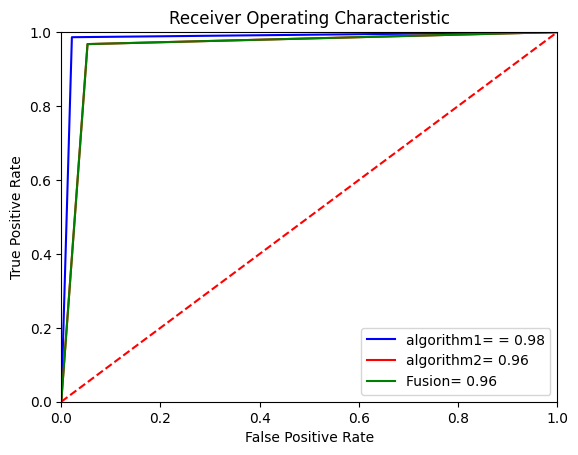

In [ ]:
# @title Fusion RF & KNN
p=1
#q=1-p
for i in range (100):
    p=p-.05
    q=1-p


    mixed=predictions1[:,1]*p+predictions2[:,1]*q
    rounded_mixed=mixed
    for i in range(len(y_test)):
        if mixed[i]>.5:
            rounded_mixed[i]=1
        else:
             rounded_mixed[i]=0

    score=metrics.accuracy_score(rounded_mixed,y_test)
    print("  mixed  p  q","%.4f" %score, "%.2f" %p,"%.2f" %q)


#after selecting the value of p and q which gives the highest accuracy. This value differs for different algorithms.
p=.05
q=1-p

mixed=predictions1[:,1]*p+predictions2[:,1]*q
rounded_mixed=mixed
for i in range(len(y_test)):
    if mixed[i]>=.5:
        rounded_mixed[i]=1
    else:
         rounded_mixed[i]=0

score=metrics.accuracy_score(rounded_mixed,y_test)
print("mixed",score)

print(metrics.confusion_matrix(y_test,rounded_mixed))
print(metrics.classification_report(y_test,rounded_mixed))

fpr, tpr, threshold = metrics.roc_curve(rounded_mixed,y_test)
roc_auc = metrics.auc(fpr, tpr)
print("roc_auc_tot",roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'algorithm1= = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'r', label = 'algorithm2= %0.2f' % roc_auc2)
plt.plot(fpr, tpr, 'g', label = 'Fusion= %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()